# Introduction to PyTorch

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import numpy as np
import helper

import matplotlib.pyplot as plt

In [2]:
def activation(x):
    
    return 1/( 1+ torch.exp(-x))

In [3]:
## Generate some data
torch.manual_seed(7)


features = torch.rand(1,5)
#rand_like takes tensor and creates a tensor in the shape of feeded tensor
weights = torch.rand_like(features) 
bias = torch.randn(1,1)


In [4]:
output = activation(torch.mm(features, weights.T) + bias)
output

tensor([[0.8274]])

# Multilayer

In [5]:
torch.manual_seed(7)
features = torch.randn(1,3)


#Define the size opf each layer in our network
n_input = features.shape[1]

n_hidden = 2

n_output = 1

W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

# bias term for hdden and output layers
B1 = torch.randn(1, n_hidden)
B2 = torch.randn(1, n_output)

In [6]:
hidden_output = activation(torch.mm(features, W1) + B1)
hidden_output

tensor([[0.6813, 0.4355]])

In [7]:
output = activation(torch.mm(hidden_output, W2) + B2)
output

tensor([[0.3171]])

# NumPy to Torch and back

In [8]:
import numpy as np

In [9]:
a = np.random.rand(4,3)
a

array([[0.19872068, 0.87708621, 0.61084187],
       [0.64601441, 0.71477889, 0.98921169],
       [0.95985146, 0.13944503, 0.45561518],
       [0.44184357, 0.33846828, 0.07912678]])

In [10]:
b = torch.from_numpy(a)
b

tensor([[0.1987, 0.8771, 0.6108],
        [0.6460, 0.7148, 0.9892],
        [0.9599, 0.1394, 0.4556],
        [0.4418, 0.3385, 0.0791]], dtype=torch.float64)

In [11]:
b.numpy()

array([[0.19872068, 0.87708621, 0.61084187],
       [0.64601441, 0.71477889, 0.98921169],
       [0.95985146, 0.13944503, 0.45561518],
       [0.44184357, 0.33846828, 0.07912678]])

Remember the memory is shared between the Numpy array and Torch.
If you do any in-place operation on either object, it will change the other as well

In [12]:
#In-place multiplication
b.mul_(2)

tensor([[0.3974, 1.7542, 1.2217],
        [1.2920, 1.4296, 1.9784],
        [1.9197, 0.2789, 0.9112],
        [0.8837, 0.6769, 0.1583]], dtype=torch.float64)

In [13]:
b

tensor([[0.3974, 1.7542, 1.2217],
        [1.2920, 1.4296, 1.9784],
        [1.9197, 0.2789, 0.9112],
        [0.8837, 0.6769, 0.1583]], dtype=torch.float64)

# PyTorch Mnist

In [21]:
from torchvision import datasets, transforms

#Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])


trainset = datasets.MNIST('MNIST_data/', download = True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [40]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

images[0].shape

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


torch.Size([1, 28, 28])

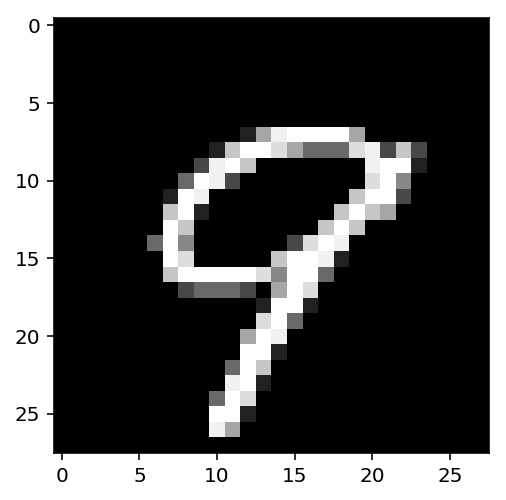

In [30]:
plt.imshow(images[0].numpy().squeeze(), cmap ='Greys_r')

In [42]:
torch.manual_seed(7)

features = images


#Define the size of each layer in our network
n_input = 28*28

n_hidden = 256

n_output = 10

W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

# bias term for hdden and output layers
B1 = torch.randn(1, n_hidden)
B2 = torch.randn(1, n_output)

In [61]:
#Forward Propagation

#features = features.reshape(64, (28*28)) or 
features = features.view(64, -1)


hidden_output = activation(torch.mm(features, W1) + B1)

final_output = torch.mm(hidden_output, W2) + B2

print(final_output.shape)

torch.Size([64, 10])


Now we have 10 outputs for our network. We want to pass in an image to our network and get out a probability distribution
over the classes that tells us the likely classes the image belongs to. To do so, we usually use softmax function

Softmax turn logits (numeric output of the last linear layer of a multi-class classification neural network) into probabilities by take the exponents of each output and then normalize each number by the sum of those exponents so the entire output vector adds up to one — all probabilities should add up to one.

In [82]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).reshape(-1,1)

In [83]:
probabilities = softmax(final_output)
probabilities.shape

torch.Size([64, 10])

In [84]:
probabilities.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])